# Multivariate Normal Distribution

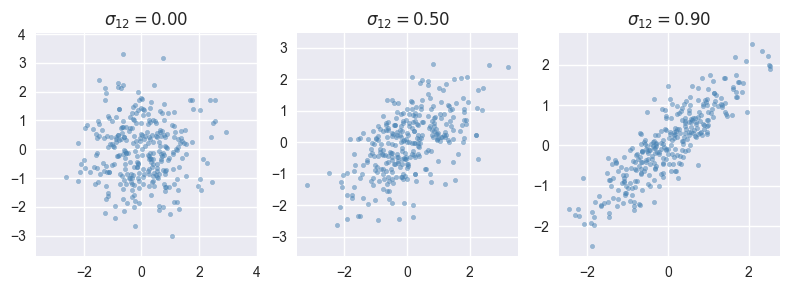

In [36]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
mean = [0, 0]
cov12s = [0, 0.5, 0.9]

fig, ax = plt.subplots(1, 3, figsize=(8, 3))

for i, cov12 in enumerate(cov12s):
    cov = [[1, cov12],
           [cov12, 1]]
    x, y = np.random.multivariate_normal(mean, cov, 300).T

    # Plot a scatter plot
    ax[i].scatter(x, y, s=10, color='steelblue', marker='o', alpha=0.5)
    ax[i].set(xlim=(-3, 3), ylim=(-3, 3))
    ax[i].set_title(r"$\sigma_{12}={%.2f}$" % cov12)
    ax[i].axis('equal')
plt.tight_layout()
plt.show()

# Sampling Functions

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.style.use("seaborn-v0_8")

In [3]:
def exp_quad_kernel(x1: float, x2: float, length=0.5):
    return np.exp(-(x1 - x2) ** 2 / (2 * length ** 2))


def covariance(x1: np.ndarray, x2: np.ndarray, kernel=exp_quad_kernel):
    assert type(x1) == np.ndarray, type(x2) == np.ndarray
    if len(x1) == len(x2):
        dim = len(x1)
        g1, g2 = np.meshgrid(x, x)
        g1 = g1.reshape(dim * dim, )
        g2 = g2.reshape(dim * dim, )
        cov = kernel(g1, g2)
        return cov.reshape(dim, dim)
    else:
        return kernel(x1, x2)

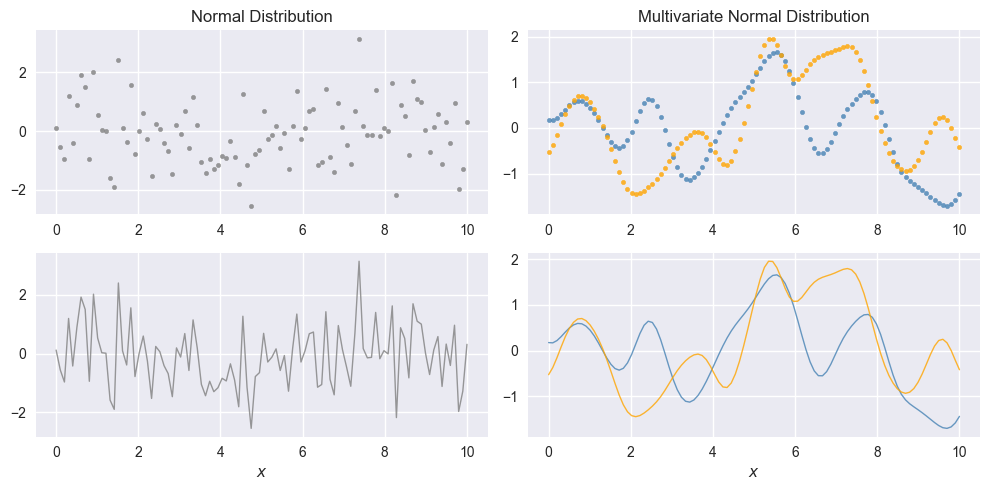

In [71]:
N = 100
x = np.linspace(0, 10, N)
fig, ax = plt.subplots(2, 2, figsize=(10, 5))

# Sample a f(x) over x from a normal distribution
f_norm = stats.norm.rvs(loc=0, scale=1, size=N)

ax[0, 0].scatter(x, f_norm, s=10, color='gray', marker='o', alpha=0.8)
ax[1, 0].plot(x, f_norm, linewidth=1, color='gray', alpha=0.8)
ax[0, 0].set_title("Normal Distribution")
ax[1, 0].set_xlabel(r"$x$")

# Sample a f(x) over x from a multivariate normal distribution
cov = covariance(x, x)
f_mvn = stats.multivariate_normal.rvs(mean=np.zeros(len(x)), cov=cov, size=2).T

# Plot with nice blue
# ax.scatter(x, f_mvn[:,0], linewidth=2, color='steelblue')
ax[0, 1].scatter(x, f_mvn[:, 0], s=10, color='steelblue', marker='o', alpha=0.8)
ax[0, 1].scatter(x, f_mvn[:, 1], s=10, color='orange', marker='o', alpha=0.8)
ax[1, 1].plot(x, f_mvn[:, 0], linewidth=1, color='steelblue', alpha=0.8)
ax[1, 1].plot(x, f_mvn[:, 1], linewidth=1, color='orange', alpha=0.8)
ax[0, 1].set_title("Multivariate Normal Distribution")
ax[1, 1].set_xlabel(r"$x$")
#ax.set_xlim([0, 10])
#ax.set_ylim([-5, 5])

plt.tight_layout()
plt.show()

# Gaussian Process

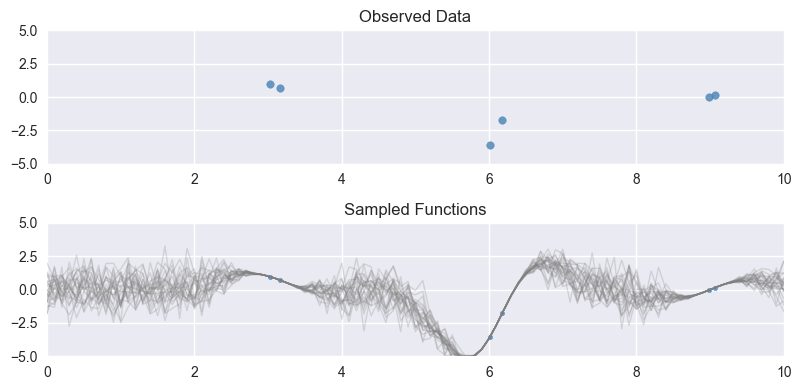

In [121]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from numpy.linalg import inv


def sample(x_new, x, y):
    """Sample y_new from a conditional probability p(y_new|x_new, x, y)"""
    K = covariance(x, x)
    k = covariance(x_new, x)
    kss = exp_quad_kernel(x_new, x_new)

    mu = k.T @ inv(K) @ y
    sigma = kss - k.T @ inv(K) @ k
    return stats.norm.rvs(mu, sigma)


# Observed data
y = np.array([0.71, 0.98, -1.75, -3.57, -0.03, 0.15])
x = np.array([3.16, 3.02, 6.18, 6.01, 8.99, 9.07])

# Sample functions conditioned on the observed data and plot it
fig, ax = plt.subplots(2, 1, figsize=(8, 4))
ax[0].scatter(x, y, s=30, color='steelblue', marker='o', alpha=0.8)
ax[1].scatter(x, y, s=10, color='steelblue', marker='o', alpha=0.8)


for i in range(25):
    xs = np.linspace(0, 10, 101)
    fs = []
    
    for x_new in xs:
        x_new = np.array([x_new])
        y_new = sample(x_new, x, y)
        fs.append(y_new)
    
    ax[1].plot(xs, fs, linewidth=1, color='gray', alpha=0.25)

ax[0].set(xlim=[0, 10], ylim=[-5, 5])
ax[1].set(xlim=[0, 10], ylim=[-5, 5])
ax[0].set_title("Observed Data")
ax[1].set_title("Sampled Functions")

plt.tight_layout()
plt.show()